In [49]:
import numpy as np
import tensorflow as tf
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
print(tf.__version__)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import backend as C
from tensorflow.keras import regularizers
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.models import load_model,Model
from tensorflow.python.keras.utils import conv_utils
from tensorflow.keras import regularizers, constraints, initializers
from tensorflow.keras.layers import GlobalAveragePooling2D
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

2.16.1


In [50]:
# path define
train_path=("/kaggle/input/datasett2/ISL - Copy/Training")

# configuration parametres
batch_size = 32
img_height = 224
img_width = 224
no_of_clases = 35
classes_name = ['1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
input_shape = (img_height,img_width,3)

# data augmentation and normalization
datagen = ImageDataGenerator(
    rescale = 1./255,
    featurewise_center=True,
    horizontal_flip=True,
    vertical_flip = True,
    validation_split = 0.1, 
    featurewise_std_normalization = True
)

# data generator
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(img_height,img_width),
    batch_size = batch_size, 
    shuffle =True,
    class_mode = 'categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    train_path,
    target_size=(img_height,img_width),
    batch_size = batch_size, 
    shuffle =True,
    class_mode = 'categorical',
    subset='validation'
)

print('train classes')
print(train_generator.class_indices)
print('train labels')
print(train_generator.labels)
print('validation clases')
print(validation_generator.class_indices)
print('validation labels')
print(validation_generator.labels)

Found 18900 images belonging to 35 classes.
Found 2100 images belonging to 35 classes.
train classes
{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, 'A': 9, 'B': 10, 'C': 11, 'D': 12, 'E': 13, 'F': 14, 'G': 15, 'H': 16, 'I': 17, 'J': 18, 'K': 19, 'L': 20, 'M': 21, 'N': 22, 'O': 23, 'P': 24, 'Q': 25, 'R': 26, 'S': 27, 'T': 28, 'U': 29, 'V': 30, 'W': 31, 'X': 32, 'Y': 33, 'Z': 34}
train labels
[ 0  0  0 ... 34 34 34]
validation clases
{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, 'A': 9, 'B': 10, 'C': 11, 'D': 12, 'E': 13, 'F': 14, 'G': 15, 'H': 16, 'I': 17, 'J': 18, 'K': 19, 'L': 20, 'M': 21, 'N': 22, 'O': 23, 'P': 24, 'Q': 25, 'R': 26, 'S': 27, 'T': 28, 'U': 29, 'V': 30, 'W': 31, 'X': 32, 'Y': 33, 'Z': 34}
validation labels
[ 0  0  0 ... 34 34 34]


In [51]:
# no. of images for 
print(len(train_generator))

591


In [52]:
# loading the pre-trained model
pretrained_model = tf.keras.applications.ResNet50V2(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

# freezing thw pre-trained model
pretrained_model.trainable = False

102869336/102869336 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [53]:
inputs = pretrained_model.input
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(50, activation='relu')(x)
outputs = tf.keras.layers.Dense(35, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)
# print(model.summary())

In [54]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [55]:
# early stopping callback
callbacks = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15, 
    restore_best_weights=True
)

# training the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=25,
    callbacks=[callbacks]
)

Epoch 1/25
591/591 ━━━━━━━━━━━━━━━━━━━━ 66s 91ms/step - accuracy: 0.2667 - loss: 2.9058 - val_accuracy: 0.5710 - val_loss: 1.6218
Epoch 2/25
591/591 ━━━━━━━━━━━━━━━━━━━━ 72s 120ms/step - accuracy: 0.7068 - loss: 1.1555 - val_accuracy: 0.7248 - val_loss: 1.0298
Epoch 3/25
591/591 ━━━━━━━━━━━━━━━━━━━━ 58s 97ms/step - accuracy: 0.8170 - loss: 0.7051 - val_accuracy: 0.7819 - val_loss: 0.7987
Epoch 4/25
591/591 ━━━━━━━━━━━━━━━━━━━━ 45s 76ms/step - accuracy: 0.8640 - loss: 0.5187 - val_accuracy: 0.8200 - val_loss: 0.6095
Epoch 5/25
591/591 ━━━━━━━━━━━━━━━━━━━━ 46s 77ms/step - accuracy: 0.8911 - loss: 0.4093 - val_accuracy: 0.8300 - val_loss: 0.5573
Epoch 6/25
591/591 ━━━━━━━━━━━━━━━━━━━━ 51s 86ms/step - accuracy: 0.9030 - loss: 0.3582 - val_accuracy: 0.8757 - val_loss: 0.4468
Epoch 7/25
591/591 ━━━━━━━━━━━━━━━━━━━━ 45s 76ms/step - accuracy: 0.9143 - loss: 0.3076 - val_accuracy: 0.8743 - val_loss: 0.4284
Epoch 8/25
591/591 ━━━━━━━━━━━━━━━━━━━━ 48s 80ms/step - accuracy: 0.9293 - loss: 0.2553 -

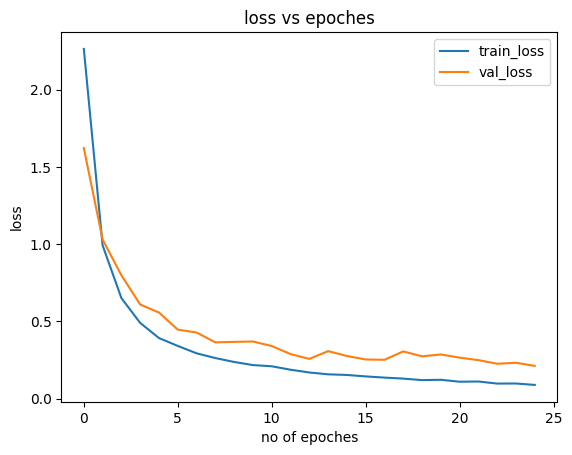

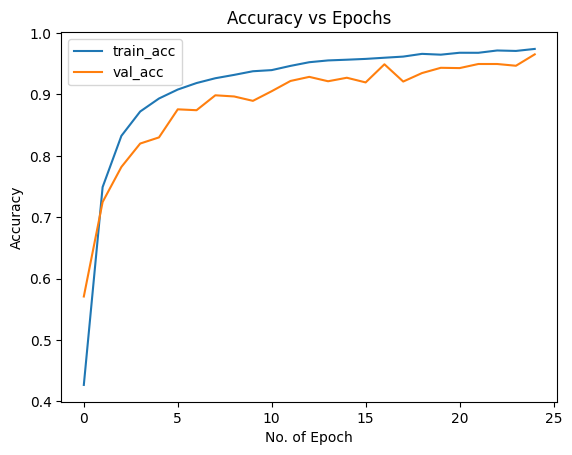

In [56]:
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.xlabel('no of epoches')
plt.ylabel('loss')
plt.title('loss vs epoches')
plt.show()

plt.plot(history.history['accuracy'],label = 'train_acc')
plt.plot(history.history['val_accuracy'],label = 'val_acc')
plt.legend()
plt.xlabel('No. of Epoch')
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.show()

In [57]:
model.save("/kaggle/working/Resnet50V2_ISL.keras")

In [58]:
from tensorflow.keras.models import load_model

model = load_model('/kaggle/working/Resnet50V2_ISL.keras')  

In [61]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, accuracy_score

# Define image dimensions
img_height, img_width = 224, 224

# Directory containing test images
test_dir = '/kaggle/input/datasett2/ISL - Copy/Testing'

# Load and preprocess images, and extract true labels
test_images = []
true_labels = []

for img_name in os.listdir(test_dir):
    img_path = os.path.join(test_dir, img_name)
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize the image
    test_images.append(img_array)

    # Extract true label from the filename
    # Assuming the label is the part before '.jpg'
    true_label = img_name.split('.')[0]
    true_labels.append(true_label)

test_images = np.array(test_images)

In [62]:
# Make predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 5s/step


In [63]:
# Map predicted labels to class names
label_map = train_generator.class_indices
inverse_label_map = {v: k for k, v in label_map.items()}
predicted_class_names = [inverse_label_map[i] for i in predicted_labels]

In [64]:
# Calculate testing accuracy
accuracy = accuracy_score(true_labels, predicted_class_names)
print(f"Testing Accuracy: {accuracy:.4f}")

Testing Accuracy: 0.9429


In [65]:
# Generate classification report
print(classification_report(true_labels, predicted_class_names))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.50      1.00      0.67         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
           A       1.00      1.00      1.00         1
           B       1.00      1.00      1.00         1
           C       1.00      1.00      1.00         1
           D       1.00      1.00      1.00         1
           E       1.00      1.00      1.00         1
           F       1.00      1.00      1.00         1
           G       1.00      1.00      1.00         1
           H       1.00      1.00      1.00         1
           I       1.00    

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
# Print individual predictions
for img_name, true_label, pred_label in zip(os.listdir(test_dir), true_labels, predicted_class_names):
    print(f"Image: {img_name}, True Label: {true_label} --> Predicted Label: {pred_label}")

Image: 6.jpg, True Label: 6 --> Predicted Label: 6
Image: S.jpg, True Label: S --> Predicted Label: S
Image: 5.jpg, True Label: 5 --> Predicted Label: 5
Image: 8.jpg, True Label: 8 --> Predicted Label: 8
Image: L.jpg, True Label: L --> Predicted Label: L
Image: B.jpg, True Label: B --> Predicted Label: B
Image: C.jpg, True Label: C --> Predicted Label: C
Image: A.jpg, True Label: A --> Predicted Label: A
Image: N.jpg, True Label: N --> Predicted Label: N
Image: I.jpg, True Label: I --> Predicted Label: I
Image: H.jpg, True Label: H --> Predicted Label: H
Image: M.jpg, True Label: M --> Predicted Label: M
Image: P.jpg, True Label: P --> Predicted Label: P
Image: 9.jpg, True Label: 9 --> Predicted Label: 9
Image: 1.jpg, True Label: 1 --> Predicted Label: 2
Image: J.jpg, True Label: J --> Predicted Label: J
Image: Q.jpg, True Label: Q --> Predicted Label: Q
Image: K.jpg, True Label: K --> Predicted Label: K
Image: O.jpg, True Label: O --> Predicted Label: O
Image: 7.jpg, True Label: 7 -->